In [1]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
filename = 'ba_example'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../csynthesizer/song_r3.III.wav')

In [47]:
f, t, Sxx = scipy.signal.spectrogram(tutor, sr)

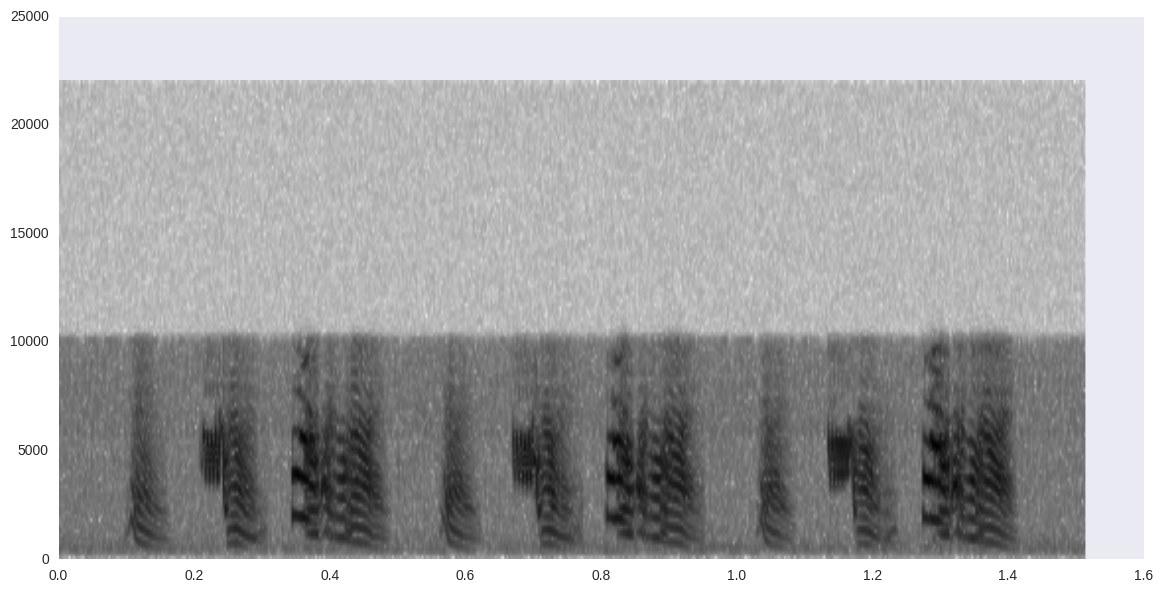

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


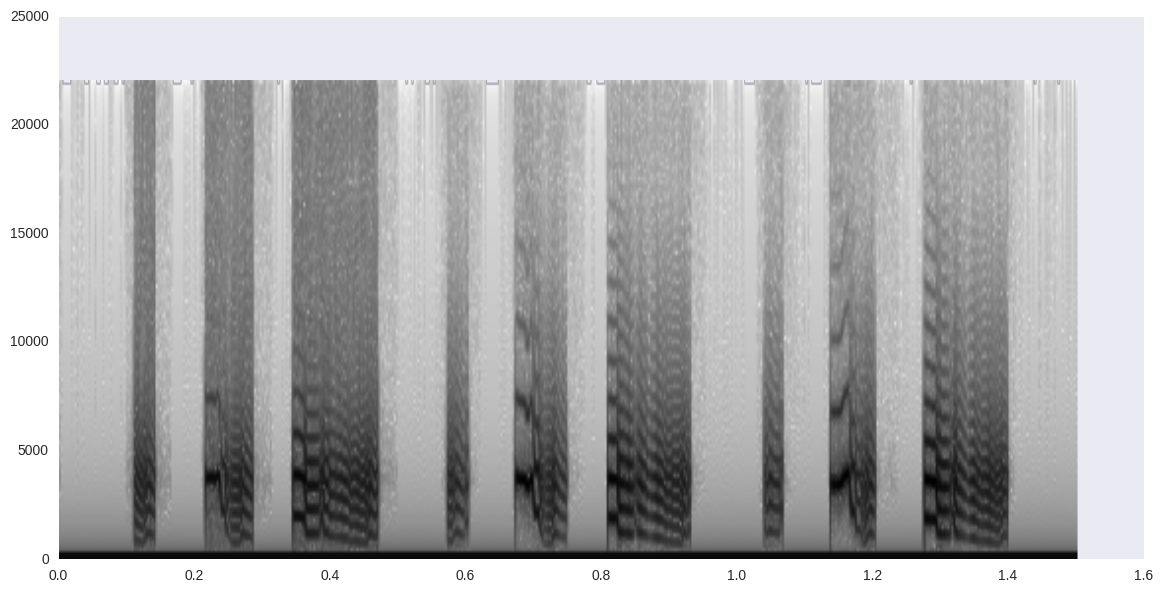

In [49]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(ba_learnt, Fs=sr)
ax.grid(False)
plt.show()

In [5]:
from python_speech_features import mfcc

In [51]:
tutor_mfcc = mfcc(tutor, sr)
ba_learnt_mfcc = mfcc(ba_learnt, sr)
np.linalg.norm(tutor_mfcc[:149] - ba_learnt_mfcc)

748.66124260889433

# Focus on syllable B of Buenos Aires song

In [7]:
filename = 'ba_syllable_b'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))

In [8]:
sr, ba_learnt = scipy.io.wavfile.read('../data/ba_syllable_out.wav')

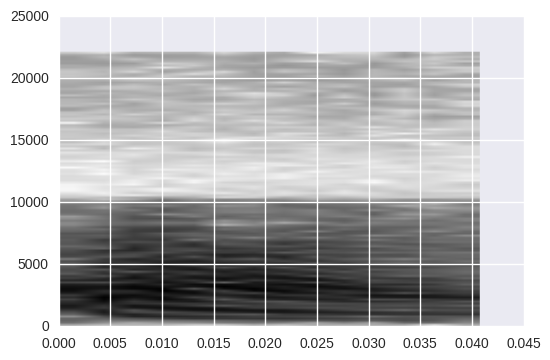

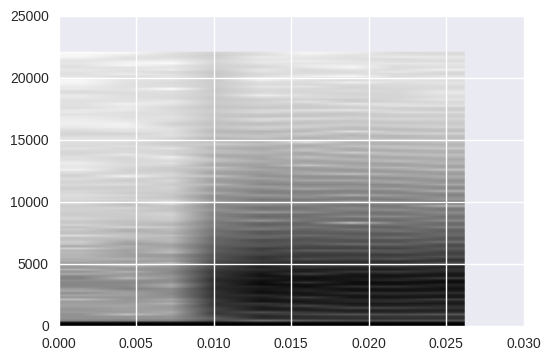

In [9]:
plt.specgram(tutor, Fs=sr)
plt.show()
plt.specgram(ba_learnt, Fs=sr)
plt.show()

In [54]:
tutor_mfcc = mfcc(tutor, sr)
ba_learnt_mfcc = mfcc(ba_learnt, sr)
np.linalg.norm(tutor_mfcc[0:2] - ba_learnt_mfcc[0:2])

115.72899093686361

# Have a look at $\alpha$ & $\beta$

In [56]:
dat = np.loadtxt('../model/test/comparison_files/ba_example_ab.dat')

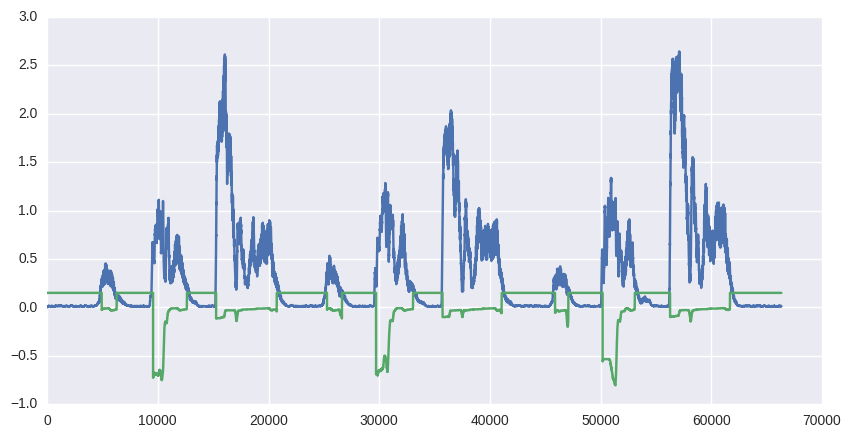

In [57]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(dat)
plt.show(fig)

4748 6328


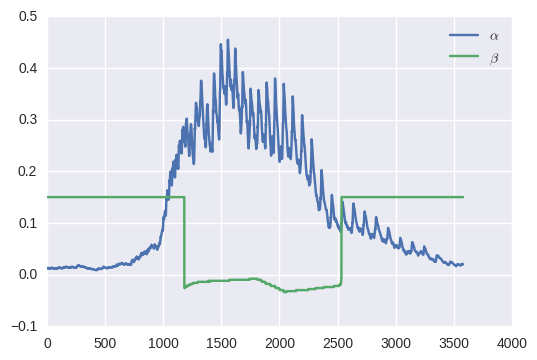

9329 12899


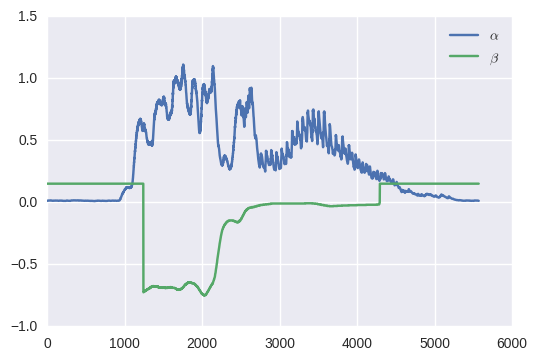

15213 21053


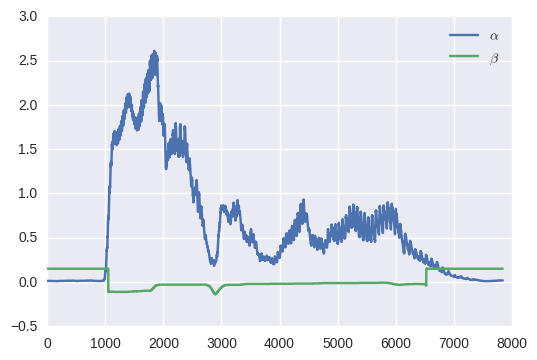

25057 26847


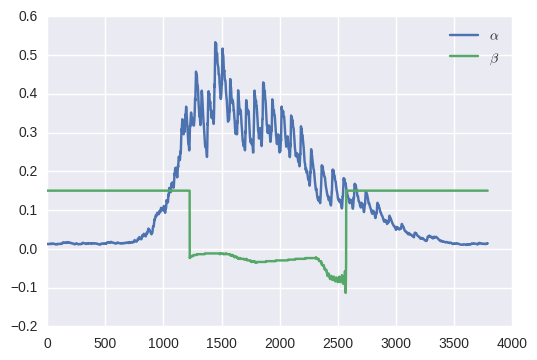

29558 33388


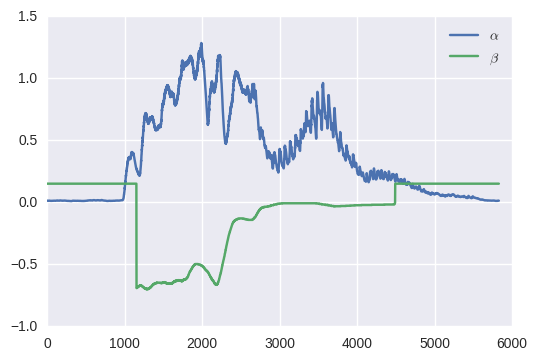

35649 41399


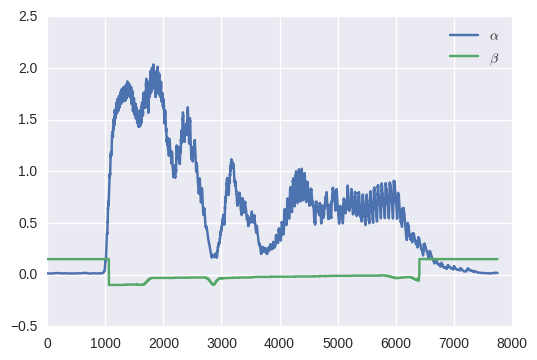

45673 47333


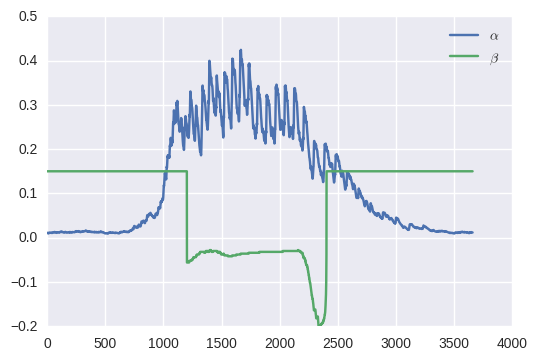

50059 53429


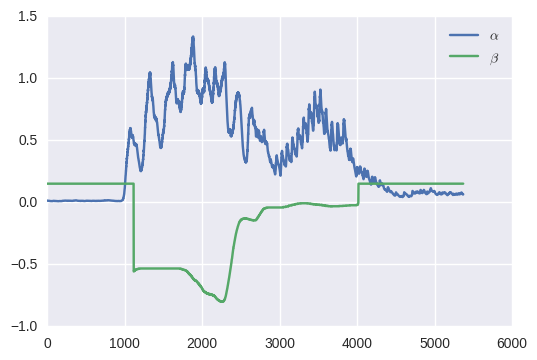

56206 62006


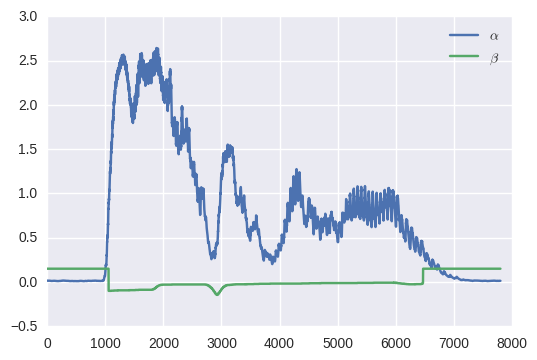

In [58]:
i = 0
while i < dat.shape[0]:
    if np.linalg.norm(dat[i] - dat[0]) > 0.1:
        j = i
        while j < dat.shape[0] and np.linalg.norm(dat[j] - dat[0]) > 0.1:
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(dat[(i-1000):(j+1000), 0], label=r"$\alpha$")
            plt.plot(dat[(i-1000):(j+1000), 1], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1

# Let's see with other birdsongs

In [27]:
sr, tutor = scipy.io.wavfile.read('../data/bells.wav')

dat = np.loadtxt('../data/bells_ab.dat')
pos = np.where(np.abs(np.diff(dat)) >= 1)[0]
#dat[pos] = np.nan

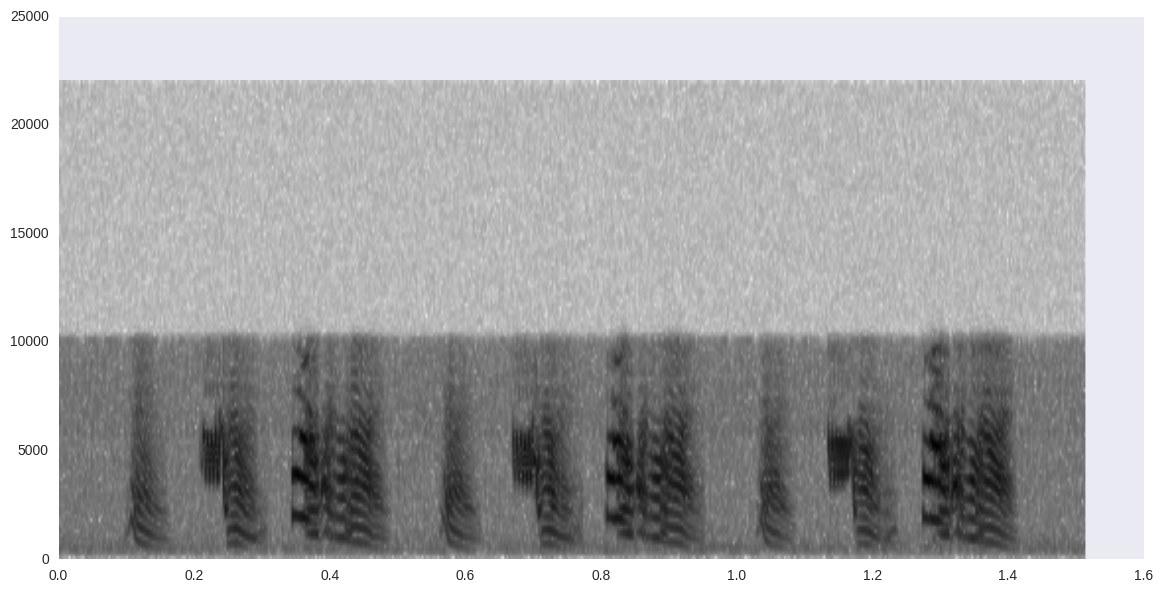

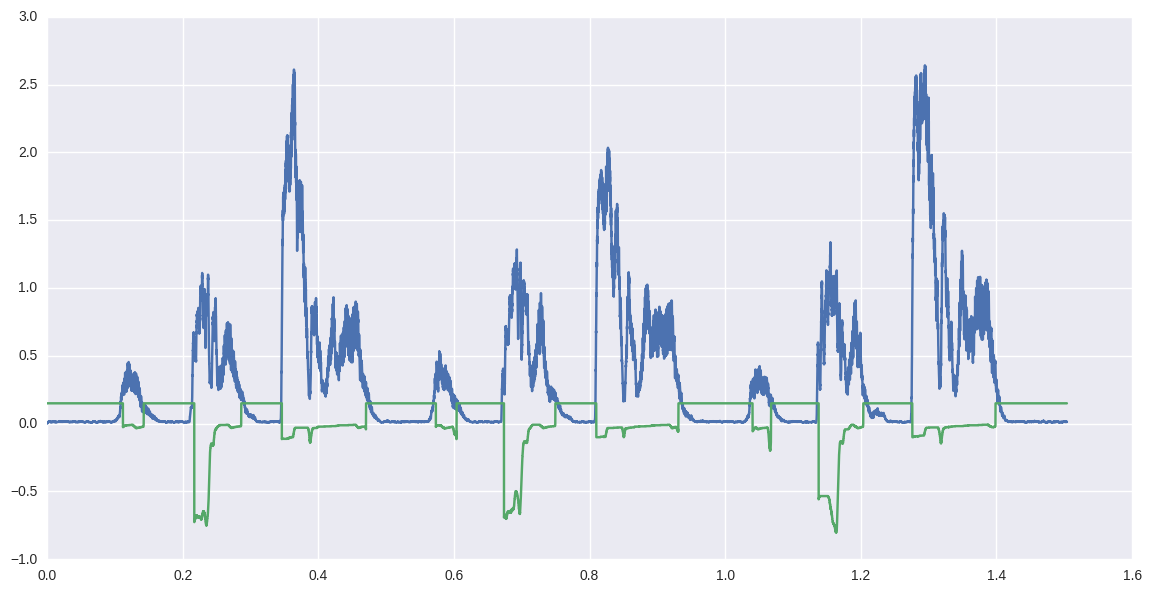

In [55]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.plot(np.arange(dat.shape[0])/sr, dat)

plt.show()

How it should be according to BA

![fit in a nice way](pretty_fit_ab_spec.png)

1771 4771


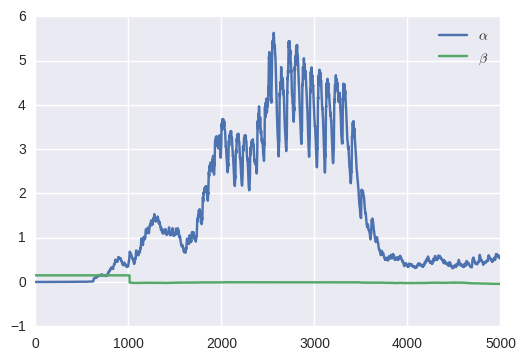

5466 8576


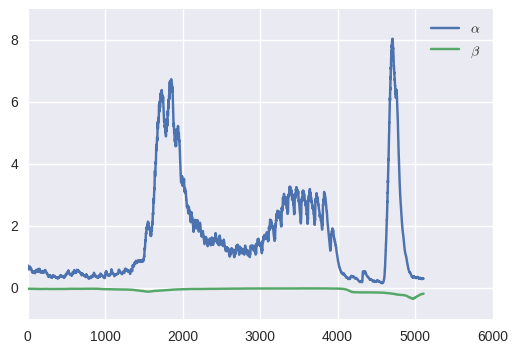

10505 13525


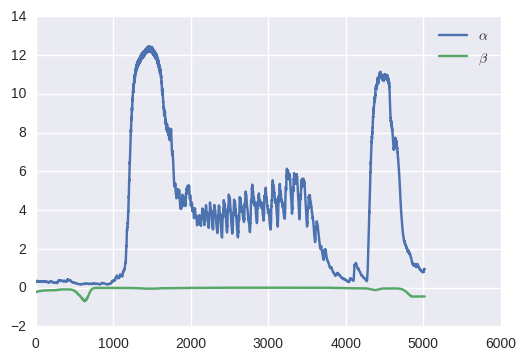

13779 17419


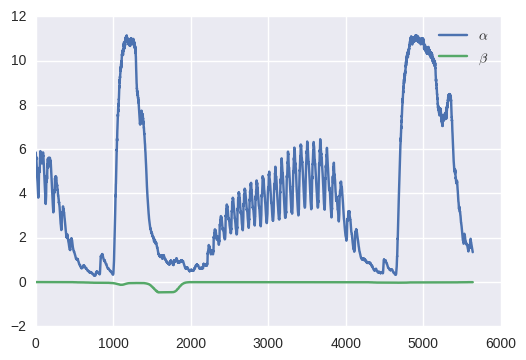

17428 26218


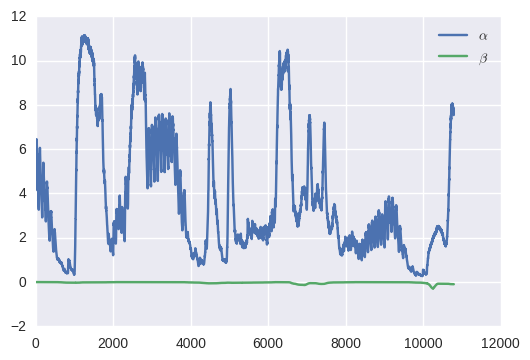

26500 29320


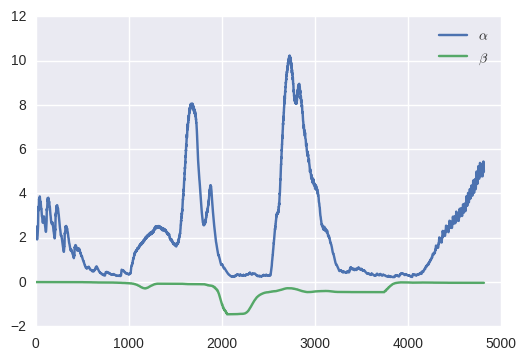

29627 33967


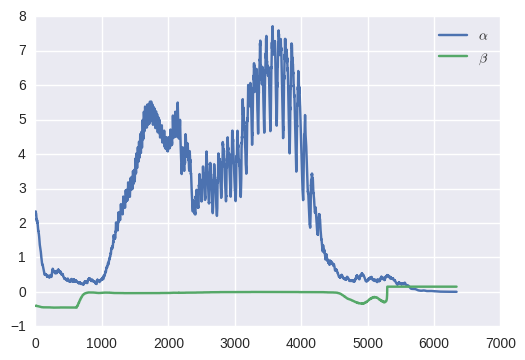

37042 40042


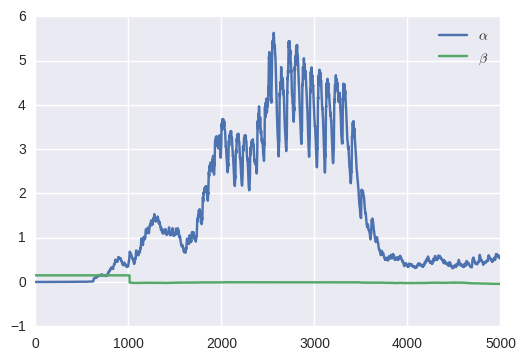

40737 43847


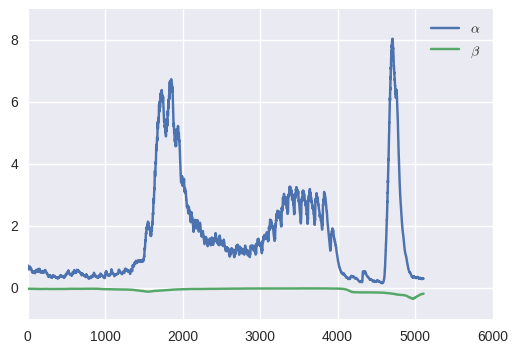

45776 48796


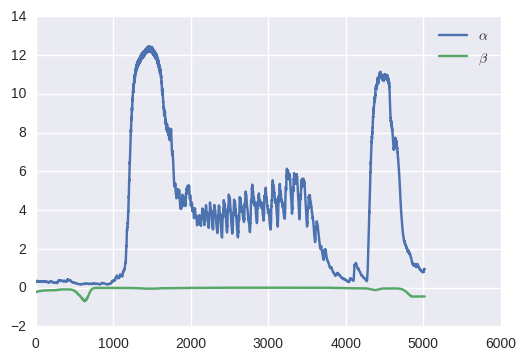

49050 52690


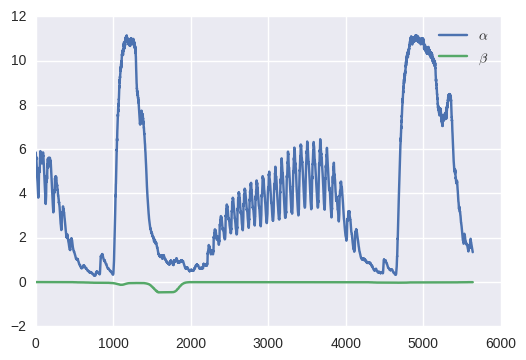

52699 61489


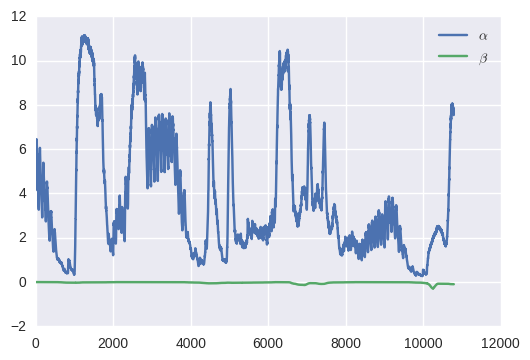

61771 64591


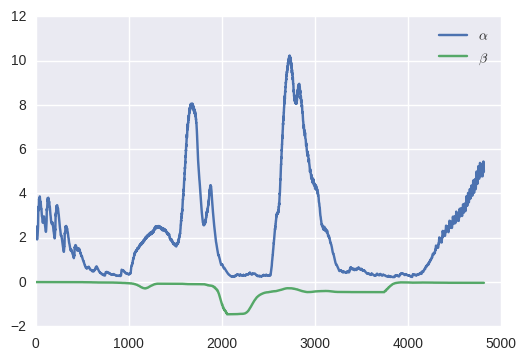

64898 69238


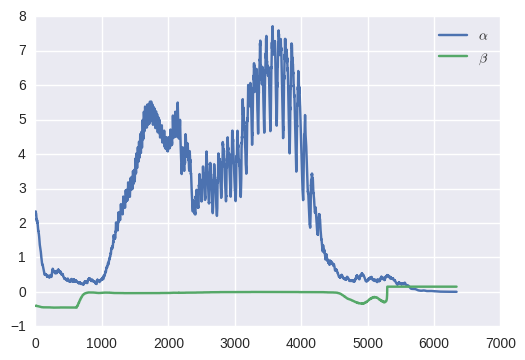

In [15]:
i = 0
while i < dat.shape[0]:
    if np.linalg.norm(dat[i] - dat[0]) > 0.4:
        j = i
        while j < dat.shape[0] and np.linalg.norm(dat[j] - dat[0]) > 0.4:
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(dat[(i-1000):(j+1000), 0], label=r"$\alpha$")
            plt.plot(dat[(i-1000):(j+1000), 1], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1

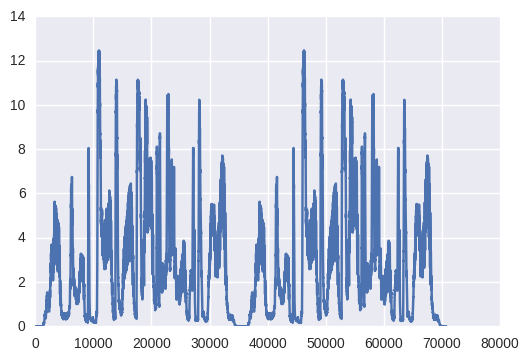

In [16]:
plt.plot(dat[:, 0])

(-0.8, 0.2)

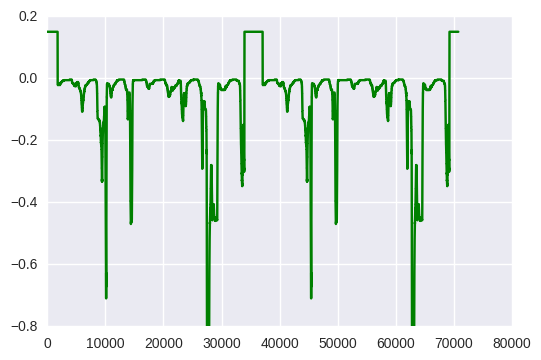

In [18]:
plt.plot(dat[:, 1], c='green')
plt.ylim((-0.8, 0.2))